In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# --- 1. Cargar  CSV ---
df = pd.read_csv("C:/Users/juana/Desktop/liquideuda_project/datasets_clean/EPC2_clean.csv")

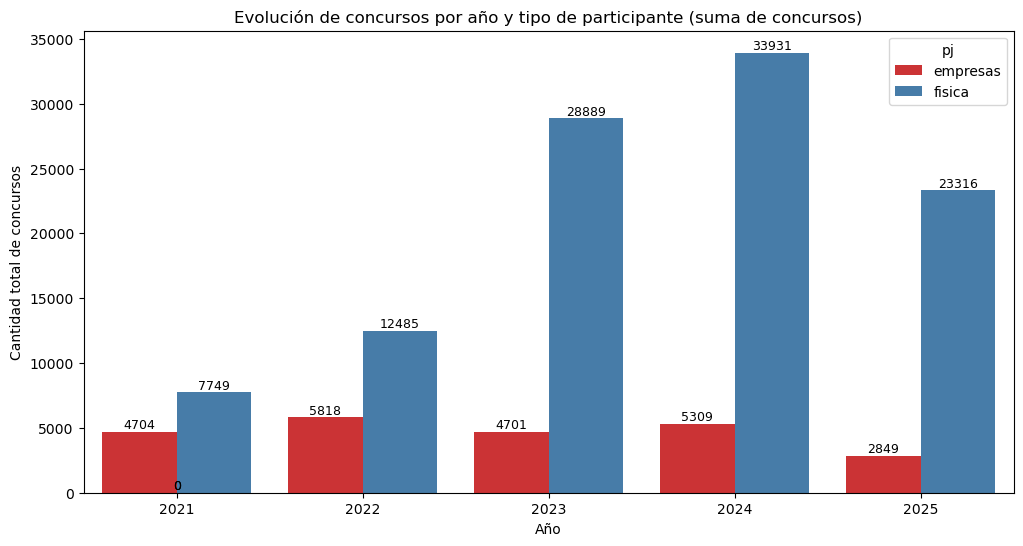

In [6]:
# --- Evolución temporal sumando la cantidad de concursos ---
# Suponiendo que la columna 'total' indica la cantidad de concursos
df_evol = df.groupby(['año', 'pj'])['total'].sum().reset_index()

plt.figure(figsize=(12,6))
ax = sns.barplot(data=df_evol, x='año', y='total', hue='pj', palette='Set1')
plt.title("Evolución de concursos por año y tipo de participante (suma de concursos)")
plt.xlabel("Año")
plt.ylabel("Cantidad total de concursos")

# Números sobre las barras
for p in ax.patches:
    ax.text(x=p.get_x() + p.get_width()/2,
            y=p.get_height(),
            s=int(p.get_height()),
            ha='center', va='bottom', fontsize=9)
plt.show()


   id_geo___ca      pj comunidad_provincia  total  t_voluntario  t_necesario  \
0          104  fisica             Almería   14.0           1.0          0.0   
1          111  fisica               Cádiz   27.0           4.0          0.0   
2          114  fisica             Córdoba   15.0           5.0          0.0   
3          118  fisica             Granada   17.0           1.0          0.0   
4          121  fisica              Huelva    8.0           1.0          0.0   

   t_consecutivo  c_ordinario  c_especial  c_sin_masa   año  trimestre  
0           13.0         13.0         0.0         1.0  2021          1  
1           23.0         23.0         1.0         3.0  2021          1  
2           10.0         11.0         0.0         4.0  2021          1  
3           16.0         14.0         1.0         2.0  2021          1  
4            7.0          8.0         0.0         0.0  2021          1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data co

C:\Users\juana\AppData\Local\Temp\ipykernel_31868\3547611031.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_participante, x='pj', y='total', palette='Set2')


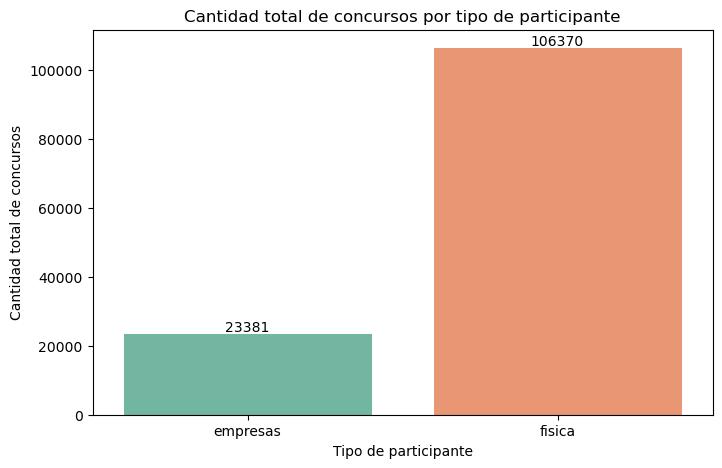

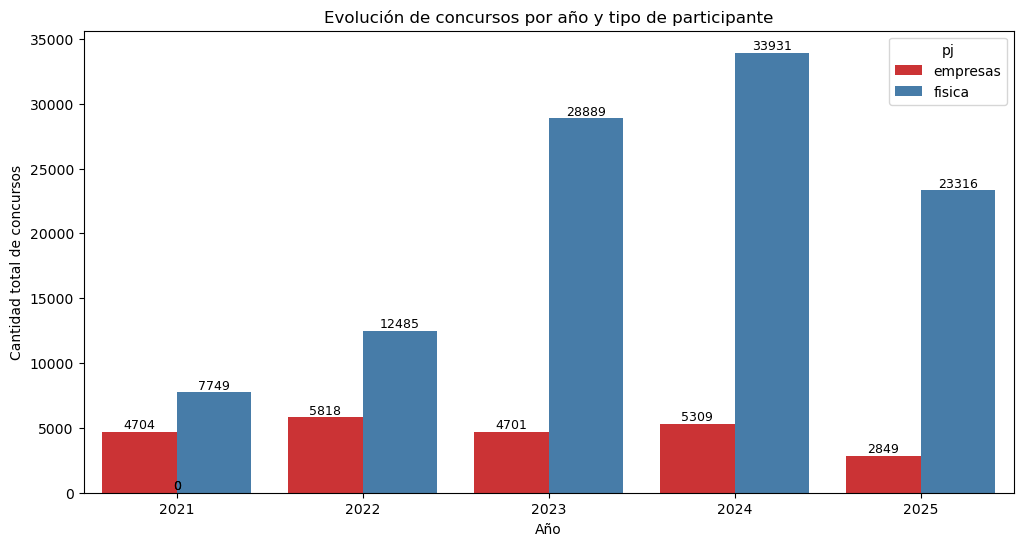

comunidad_provincia
Barcelona         29045.0
Madrid            20515.0
Valencia           9939.0
Canarias           6596.0
Murcia             6055.0
Sevilla            4840.0
Balears, Illes     3440.0
Aragón             3088.0
Girona             2950.0
Tarragona          2904.0
Name: total, dtype: float64


TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.

<Figure size 1200x600 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Cargar CSV ---
df = pd.read_csv("C:/Users/juana/Desktop/liquideuda_project/datasets_clean/EPC2_clean.csv")

# --- 2. Revisión inicial ---
print(df.head())
print(df.info())
print(df.describe())
print(df['pj'].value_counts())  # Distribución de personas físicas vs empresas

# --- 3. Cantidad total de concursos por tipo de participante ---
df_participante = df.groupby('pj')['total'].sum().reset_index()

plt.figure(figsize=(8,5))
ax = sns.barplot(data=df_participante, x='pj', y='total', palette='Set2')
plt.title("Cantidad total de concursos por tipo de participante")
plt.xlabel("Tipo de participante")
plt.ylabel("Cantidad total de concursos")
for p in ax.patches:
    ax.text(x=p.get_x() + p.get_width()/2,
            y=p.get_height(),
            s=int(p.get_height()),
            ha='center', va='bottom')
plt.show()

# --- 4. Evolución temporal de concursos por año y tipo de participante ---
df_evol = df.groupby(['año', 'pj'])['total'].sum().reset_index()

plt.figure(figsize=(12,6))
ax = sns.barplot(data=df_evol, x='año', y='total', hue='pj', palette='Set1')
plt.title("Evolución de concursos por año y tipo de participante")
plt.xlabel("Año")
plt.ylabel("Cantidad total de concursos")
for p in ax.patches:
    ax.text(x=p.get_x() + p.get_width()/2,
            y=p.get_height(),
            s=int(p.get_height()),
            ha='center', va='bottom', fontsize=9)
plt.show()


# --- 6. Distribución de concursos por tipo de concurso ---
tipo_cols = ['c_ordinario', 'c_especial', 'c_sin_masa']
df_melted = df.melt(id_vars=['pj'], value_vars=tipo_cols, var_name='tipo_concurso', value_name='cantidad')

plt.figure(figsize=(10,6))
ax = sns.barplot(data=df_melted, x='tipo_concurso', y='cantidad', hue='pj', palette='Set2', estimator=sum)
plt.title("Cantidad total de concursos por tipo y tipo de participante")
plt.xlabel("Tipo de concurso")
plt.ylabel("Cantidad total de concursos")
for p in ax.patches:
    ax.text(x=p.get_x() + p.get_width()/2,
            y=p.get_height(),
            s=int(p.get_height()),
            ha='center', va='bottom', fontsize=9)
plt.show()

# --- 7. Analizando tiempos consecutivos de concursos ---
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='pj', y='t_consecutivo', palette='Set1')
plt.title("Distribución del tiempo consecutivo de concursos por tipo de participante")
plt.xlabel("Tipo de participante")
plt.ylabel("Tiempo consecutivo")
plt.show()

# --- 8. Correlación entre variables numéricas ---
plt.figure(figsize=(10,8))
sns.heatmap(df[['total', 't_voluntario', 't_necesario', 't_consecutivo']].corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de correlación entre variables numéricas")
plt.show()


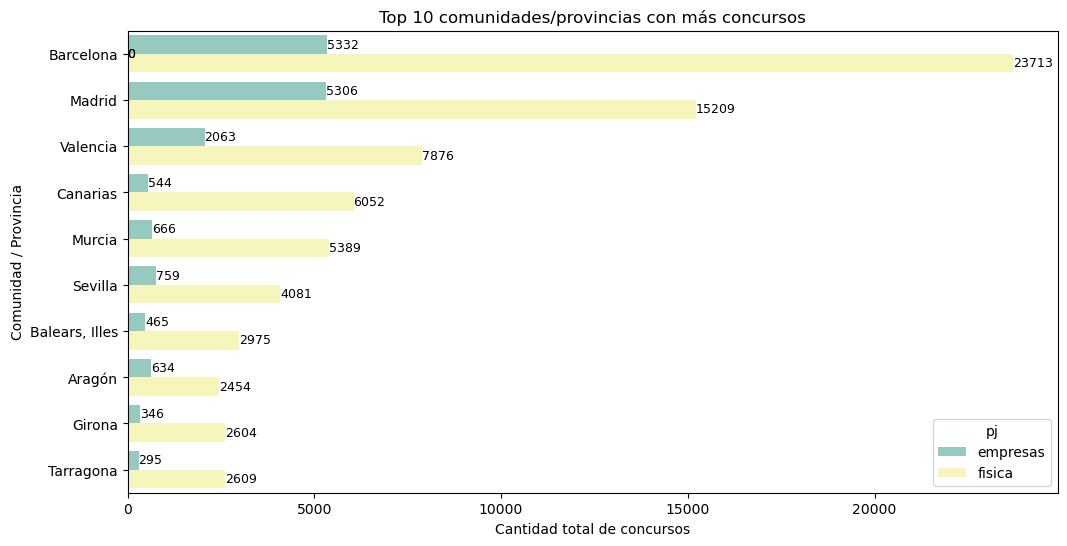

In [11]:
# Ordenar comunidades de mayor a menor según total de concursos
orden_comunidades = df_comunidad_sum.groupby('comunidad_provincia')['total'].sum().sort_values(ascending=False).index

plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=df_comunidad_sum,
    y='comunidad_provincia',
    x='total',
    hue='pj',
    palette='Set3',
    order=orden_comunidades  # <- aquí ordenamos
)
plt.title("Top 10 comunidades/provincias con más concursos")
plt.xlabel("Cantidad total de concursos")
plt.ylabel("Comunidad / Provincia")

# Números sobre las barras
for p in ax.patches:
    ax.text(x=p.get_width() + 1,
            y=p.get_y() + p.get_height()/2,
            s=int(p.get_width()),
            ha='left', va='center', fontsize=9)
plt.show()

